<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_XGB_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from xgboost import XGBRegressor as XGBR

In [0]:
import numpy as np
import pandas as pd

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [0]:
data = pd.read_csv ('CAR.csv')

In [5]:
data.describe ()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
data.columns.values

array(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size',
       'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype=object)

In [7]:
data['Vehicle Size'].value_counts(), len (data['Make'].value_counts())

(Compact    4764
 Midsize    4373
 Large      2777
 Name: Vehicle Size, dtype: int64, 48)

https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe

In [8]:
ohe = OneHotEncoder (drop='first')
ohe.fit (data['Vehicle Size'].values.reshape(-1,1))
temp = ohe.transform (data['Vehicle Size'].values.reshape(-1,1))

ohe.categories_

[array(['Compact', 'Large', 'Midsize'], dtype=object)]

In [0]:
data  = pd.get_dummies(data, prefix=['Size'], columns = ['Vehicle Size'], drop_first=True)

In [10]:
data.columns.values

array(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'Size_Large',
       'Size_Midsize'], dtype=object)

In [0]:
data['Manual'] = (data['Transmission Type'] == 'Manual') * 1

In [12]:
max (data['Year']), min (data['Year']) 

(2017, 1990)

In [0]:
data['Current'] = (max (data['Year']) - data['Year'])

In [0]:
data_n = data._get_numeric_data()

In [15]:
data_n.head(3)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Size_Large,Size_Midsize,Manual,Current
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,0,6
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,0,6
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,0,6


In [16]:
data_n.columns.values

array(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'Size_Large',
       'Size_Midsize', 'Manual', 'Current'], dtype=object)

In [0]:
predict_with = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'Size_Large', 'Size_Midsize', 'Manual', 'Current']

In [0]:
X = data_n[predict_with].values

In [0]:
y = data_n['MSRP'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2)

In [0]:
model = XGBR (learning_rate=0.05)

In [22]:
model.fit (X_train, y_train)

[20:41:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict (X_test)

https://scikit-learn.org/stable/modules/model_evaluation.html

In [24]:
len(y_pred), len(y_test)

(2383, 2383)

In [25]:
mean_squared_error (y_test, y_pred)

365074335.0156049

In [26]:
y_test[:5]

array([ 28395,  36625, 185800,  47750,   2637], dtype=int64)

In [27]:
y_pred[:5]

array([ 23730.047,  36965.44 , 207663.73 ,  49127.668,   4610.011],
      dtype=float32)

In [0]:
data_n.to_csv('CARN.csv', index=False)

In [32]:
model = XGBR (objective='reg:squarederror', learning_rate=0.5, max_depth=7, gamma=1, eval='error', n_estimators=20)
model.fit (X_train, y_train, verbose=False, eval_set=[(X_test, y_test)], early_stopping_rounds=10, eval_metric=['error','logloss'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval='error', gamma=1,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=20,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [33]:
kfold = StratifiedKFold (n_splits=10, shuffle=True, random_state=23)
results = cross_val_score (model, X, y, cv=kfold)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [34]:
results.mean(), results.std()

(0.8727201401920908, 0.09018598409373131)

In [0]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

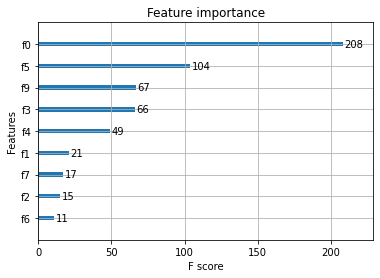

In [36]:
plot_importance (model)
plt.show()

In [40]:
data_n.columns.values[[0,5,9,3,4]]

array(['Year', 'city mpg', 'Size_Midsize', 'Number of Doors',
       'highway MPG'], dtype=object)